In [1]:
import keras
import numpy as np
from keras.layers import Dense,Dropout,Flatten
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)
X_train = X_train/255.
X_test = X_test/255.

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [6]:
model = Sequential()

In [7]:
model.add(Dense(512,activation='relu',kernel_initializer='normal',input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [9]:
history = model.fit(X_train,y_train,epochs=20,batch_size=600,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1749 - accuracy: 0.9575 - val_loss: 0.1101 - val_accuracy: 0.9712
Epoch 2/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1394 - accuracy: 0.9660 - val_loss: 0.0993 - val_accuracy: 0.9738
Epoch 3/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1128 - accuracy: 0.9722 - val_loss: 0.0924 - val_accuracy: 0.9777
Epoch 4/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0960 - accuracy: 0.9766 - val_loss: 0.0857 - val_accuracy: 0.9777
Epoch 5/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0846 - accuracy: 0.9796 - val_loss: 0.0964 - val_accuracy: 0.9766
Epoch 6/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0775 - accuracy: 0.9809 - val_loss: 0.0977 - val_accuracy: 0.9781
Epoch 7/20
60000/60000 [==============================] - 4s 63us/st

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
history = pd.DataFrame(history.history)

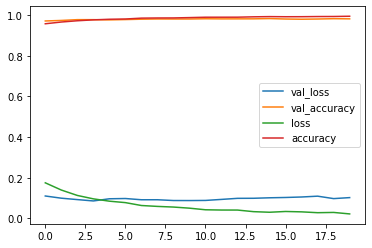

In [15]:
history.plot()

In [17]:
result = model.predict(X_test)

In [19]:
for i in range(9):
    print("Real {}, Predicted {}".format(np.argmax(y_test[i]),np.argmax(result[i])))

Real 7, Predicted 7
Real 2, Predicted 2
Real 1, Predicted 1
Real 0, Predicted 0
Real 4, Predicted 4
Real 1, Predicted 1
Real 4, Predicted 4
Real 9, Predicted 9
Real 5, Predicted 6
